<button data-commandLinker-command="progressivis:cleanup_and_run" data-commandlinker-args='{"index": 1}' href="#">Run ProgressiVis</button>

In [1]:
from ipyprogressivis.widgets import get_header, Constructor
from ipyprogressivis.widgets.chaining.utils import create_root
import panel as pn 
header = get_header()
display(header.talker)
display(header.backup)
pn.extension('ace', 'jsoneditor', 'ipywidgets')
_ = header.constructor
with header.modules_out:
    display(header.board)
with header.widgets_out:
    display(header.manager)
header.talker.labcommand("notebook:hide-cell-code")
%reload_ext ipyprogressivis.magics
create_root(header.backup)

## root
### Progressive Loading and Visualization
This **ProgressiBook** demonstrates the use of chaining widgets to implement the scenario introduced in [userguide1.1.ipynb](https://github.com/progressivis/progressivis/blob/master/notebooks/userguide1.1.ipynb). It progressively downloads New York Yellow Taxi trip data and visualizes the pickup locations.


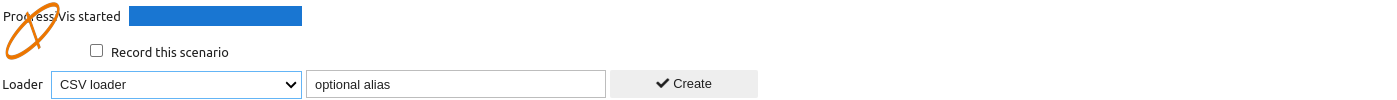

Starting scheduler
# Scheduler added module(s): ['sink_1', 'variable_1']


In [2]:
# do not run this cell
display(header.constructor)
header.constructor.start_scheduler()
header.talker.labcommand('notebook:hide-cell-code')

## Taxis
This first widget handles the configuration and progressive loading of CSV files. It utilizes settings previously created and saved in a file named `taxis`(see [CSV loader](https://progressivis.readthedocs.io/en/latest/notebooks.html#csv-loader) for more details).


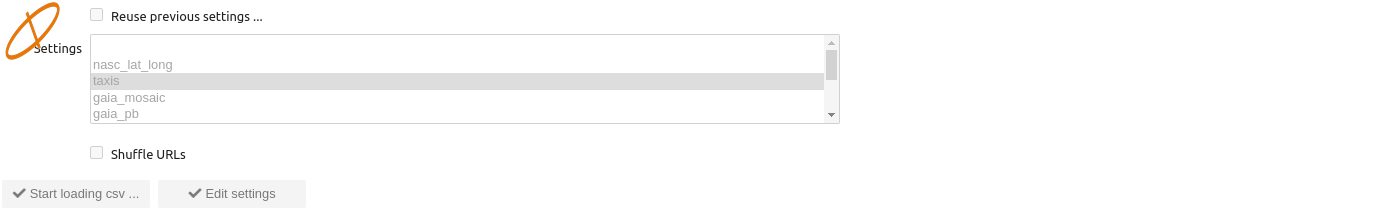

In [3]:
Constructor.widget('Taxis', 0)

## Quantiles
This widget creates a `Quantiles` module and connects it to the output of the previously defined CSV loader.
The `Quantiles` module maintains an internal data structure, known as a data sketch, to quickly (though approximately) compute quantiles for all loaded numerical columns. This approach is necessary because the dataset's minimum and maximum values are noisy.
At this stage, the Quantiles module is created and partially configured: both the pickup_latitude and pickup_longitude columns are selected (although the incomplete snapshot below only displays pickup_longitude).


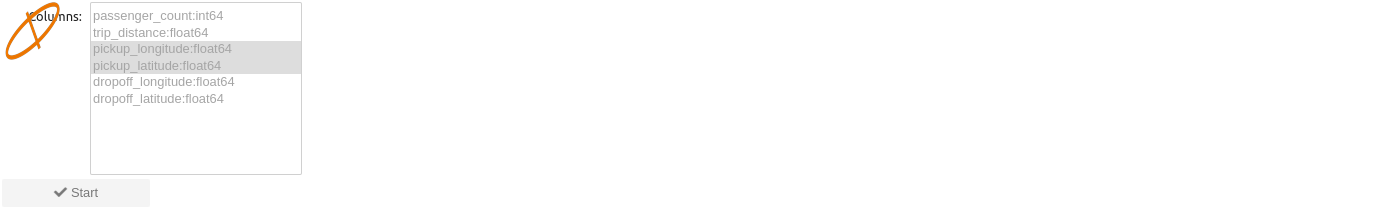

In [4]:
Constructor.widget('Quantiles', 0)

## Heatmap
This widget finalizes the configuration of the `min` and `max` values for the previously created `Quantiles`.
It also creates the `Histogram2D` module to count all pickup locations on a `512x512` grid.
Finally, a `Heatmap` module is created and connected to the output of the Histogram2D module. This module converts the 2D histogram into an image, displayed below.


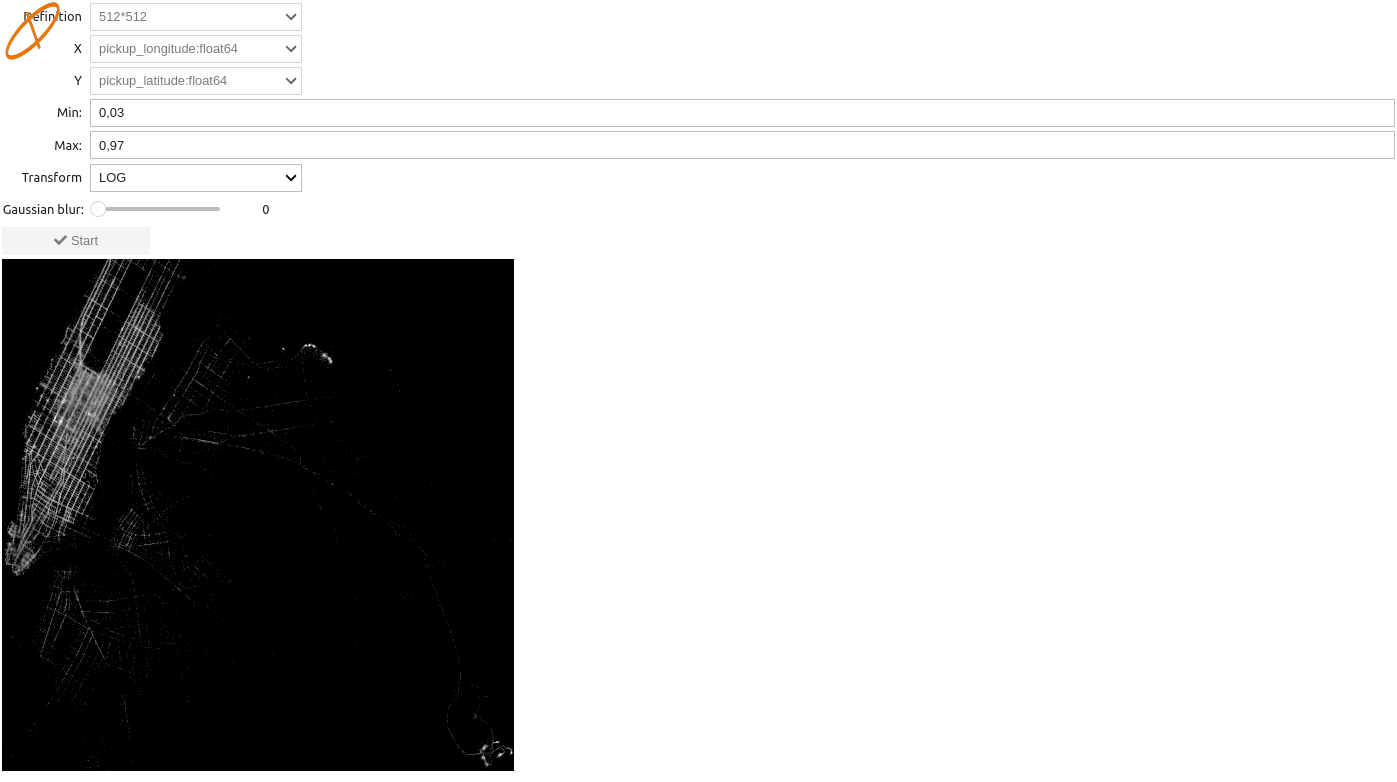

In [5]:
Constructor.widget('Heatmap', 0)